In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 558.9 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.5 MB 558.9 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.5 MB 558.9 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 493.7 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 493.7 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 503.5 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 503.5 kB/s eta 0:00:01
   ------------------------------------ 

In [2]:
# -------------------------------
# Step 1: Load the data
# -------------------------------
train = pd.read_csv(r"C:\Users\LENOVO\python datascience basics (hydrabad ds)\ASSIGNMENT DATA SCIENCE\XGBM & LGBM\Titanic_train.csv")
test = pd.read_csv(r"C:\Users\LENOVO\python datascience basics (hydrabad ds)\ASSIGNMENT DATA SCIENCE\XGBM & LGBM\Titanic_test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)



Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


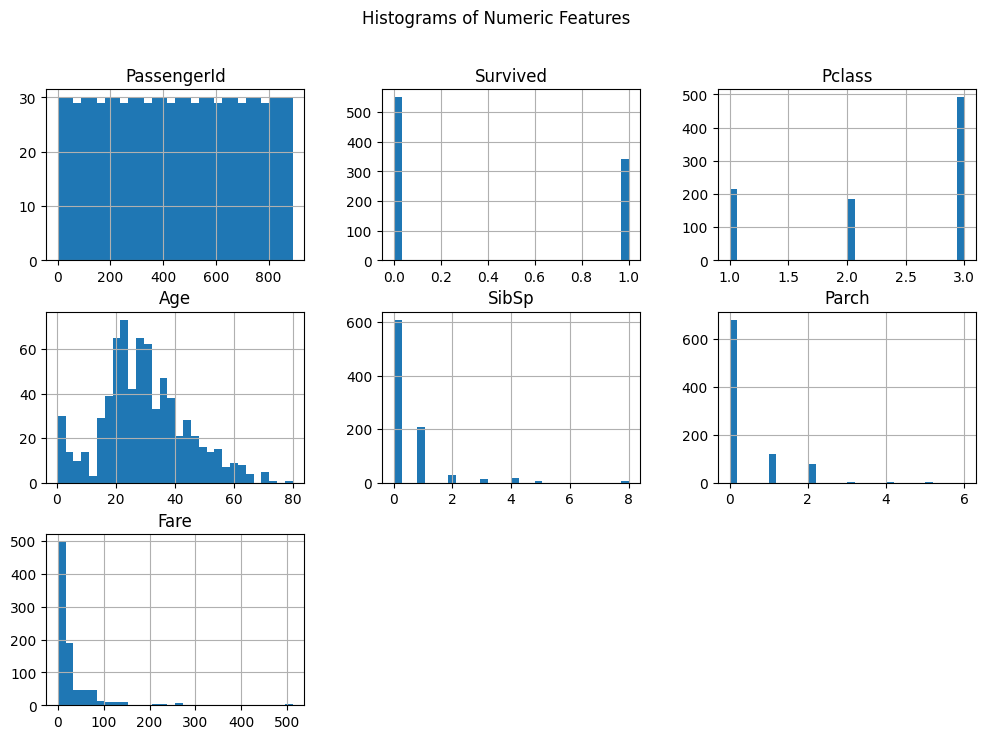

In [3]:

# -------------------------------
# Step 2: EDA
# -------------------------------
# Missing values
print("\nMissing values:\n", train.isnull().sum())

# Histograms for numeric features
train.hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()


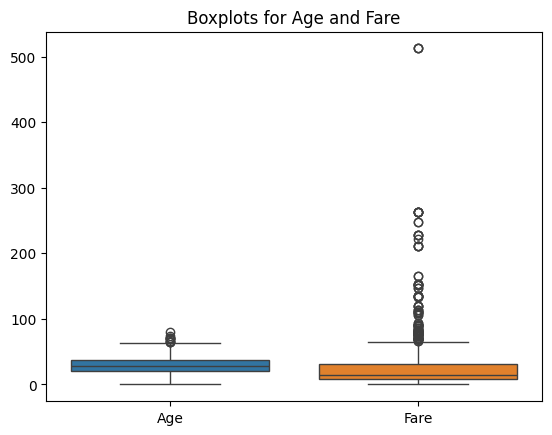

In [4]:
# Boxplots
sns.boxplot(data=train[['Age', 'Fare']])
plt.title("Boxplots for Age and Fare")
plt.show()


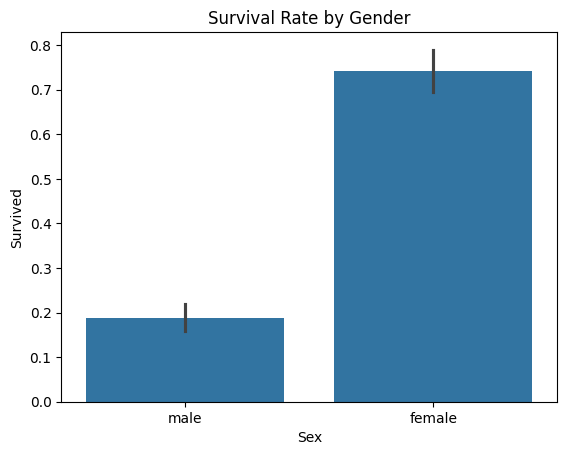

In [5]:
# Bar plot: Survival by Sex
sns.barplot(data=train, x="Sex", y="Survived")
plt.title("Survival Rate by Gender")
plt.show()

In [6]:

# -------------------------------
# Step 3: Preprocessing
# -------------------------------
def preprocess(df):
    df = df.copy()
    # Impute Age and Embarked
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    if 'Fare' in df.columns:
        df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Drop unnecessary columns
    df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True, errors='ignore')

    # Encode categorical variables
    for col in ['Sex', 'Embarked']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    return df

train_processed = preprocess(train)
test_processed = preprocess(test)

# Split train into features and target
X = train_processed.drop("Survived", axis=1)
y = train_processed["Survived"]


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Initialize models
lgbm = LGBMClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the models
lgbm.fit(X_train, y_train)
xgb.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions
lgbm_preds = lgbm.predict(X_test)
xgb_preds = xgb.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print()

# Evaluate both models
evaluate_model(y_test, lgbm_preds, "LightGBM")
evaluate_model(y_test, xgb_preds, "XGBoost")


--- LightGBM Evaluation ---
Accuracy: 0.7988826815642458
Precision: 0.7619047619047619
Recall: 0.6956521739130435
F1 Score: 0.7272727272727272
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179


--- XGBoost Evaluation ---
Accuracy: 0.8156424581005587
Precision: 0.7647058823529411
Recall: 0.7536231884057971
F1 Score: 0.759124087591241
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179




In [11]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
lgbm_cv = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='accuracy')
xgb_cv = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

print("LightGBM CV Accuracy:", lgbm_cv.mean())
print("XGBoost CV Accuracy:", xgb_cv.mean())


[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


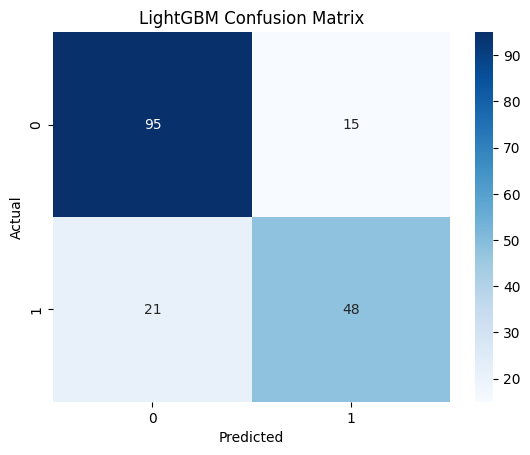

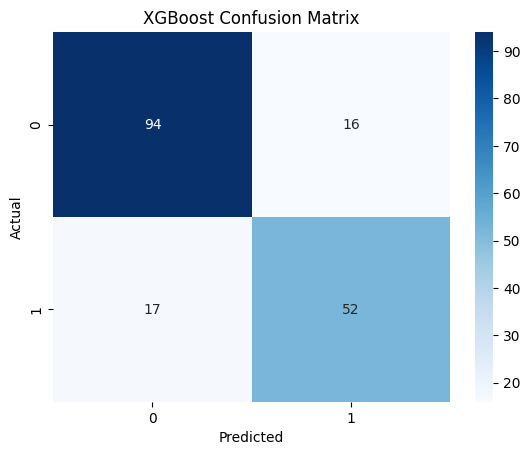

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix plot
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, lgbm_preds, "LightGBM Confusion Matrix")
plot_confusion_matrix(y_test, xgb_preds, "XGBoost Confusion Matrix")


##  Comparative Analysis Summary
 **LightGBM**
Faster training.
 Better recall, suitable when false negatives are costly.

 **XGBoost**
Slightly higher accuracy and precision.
 Slower, but often better after tuning.

###  Conclusion:
Both models are strong performers. Your choice depends on whether speed or sensitivity is more important.
